In [42]:
%matplotlib widget

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.stats import linregress
from scipy import stats

In [44]:
# Study data files
social_media_path = ("cleaned_smmh.csv")

In [45]:
# Read the data
social_media_data = pd.read_csv(social_media_path)

In [46]:
social_media_data.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,...,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,5,2,5,2,3,2,5,4,5,43
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,4,5,4,5,1,1,5,4,5,43
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,2,5,4,3,3,1,4,2,5,35
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,3,5,3,5,1,2,4,3,2,35
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,4,5,5,3,3,3,4,4,1,44


In [47]:
plat = social_media_data["Platforms"]

plat

0      Facebook, Twitter, Instagram, YouTube, Discord...
1      Facebook, Twitter, Instagram, YouTube, Discord...
2                Facebook, Instagram, YouTube, Pinterest
3                                    Facebook, Instagram
4                           Facebook, Instagram, YouTube
                             ...                        
476                         Facebook, Instagram, YouTube
477                                    Facebook, YouTube
478                                    Facebook, YouTube
479    Facebook, Twitter, Instagram, YouTube, Discord...
480                                    Facebook, YouTube
Name: Platforms, Length: 481, dtype: object

In [48]:
#Get the total number of users per platform
fb_count = 0
twt_count = 0
pint_count = 0
snap_count = 0 
insta_count = 0
red_count = 0
yt_count = 0
dis_count = 0
tt_count = 0

for item in plat:
    if "Facebook" in item:
        fb_count += 1
for item in plat:
    if "Twitter" in item:
        twt_count += 1
for item in plat:
    if "Pinterest" in item:
        pint_count += 1
for item in plat:
    if "Snapchat" in item:
        snap_count += 1
for item in plat:
    if "Instagram" in item:
        insta_count += 1
for item in plat:
    if "Reddit" in item:
        red_count += 1
for item in plat:
    if "YouTube" in item:
        yt_count += 1
for item in plat:
    if "Discord" in item:
        dis_count += 1
for item in plat:
    if "TikTok" in item:
        tt_count += 1

print(fb_count)
print(twt_count)
print(pint_count)
print(snap_count)
print(insta_count)
print(red_count)
print(yt_count)
print(dis_count)
print(tt_count)

407
131
145
181
359
126
412
198
94


In [49]:
#Find the different social media platform counts
unique_platforms_df = pd.DataFrame({"Facebook": [fb_count],
                                 "Twitter": [twt_count],
                                 "Instagram": [insta_count],
                                 "YouTube": [yt_count],
                                 "Discord": [dis_count],
                                 "Reddit": [red_count],
                                 "Pinterest": [pint_count],
                                 "TikTok": [tt_count],
                                 "Snapchat": [snap_count]



})
unique_platforms_df


,Facebook,Twitter,Instagram,YouTube,Discord,Reddit,Pinterest,TikTok,Snapchat
0,407,131,359,412,198,126,145,94,181


In [50]:
platforms_df = pd.DataFrame({"Facebook",
                                 "Twitter",
                                 "Instagram",
                                 "YouTube",
                                 "Discord",
                                 "Reddit",
                                 "Pinterest",
                                 "TikTok",
                                 "Snapchat" 



})
platforms_df


,0
0,Discord
1,YouTube
2,Snapchat
3,Instagram
4,Reddit
5,TikTok
6,Facebook
7,Pinterest
8,Twitter


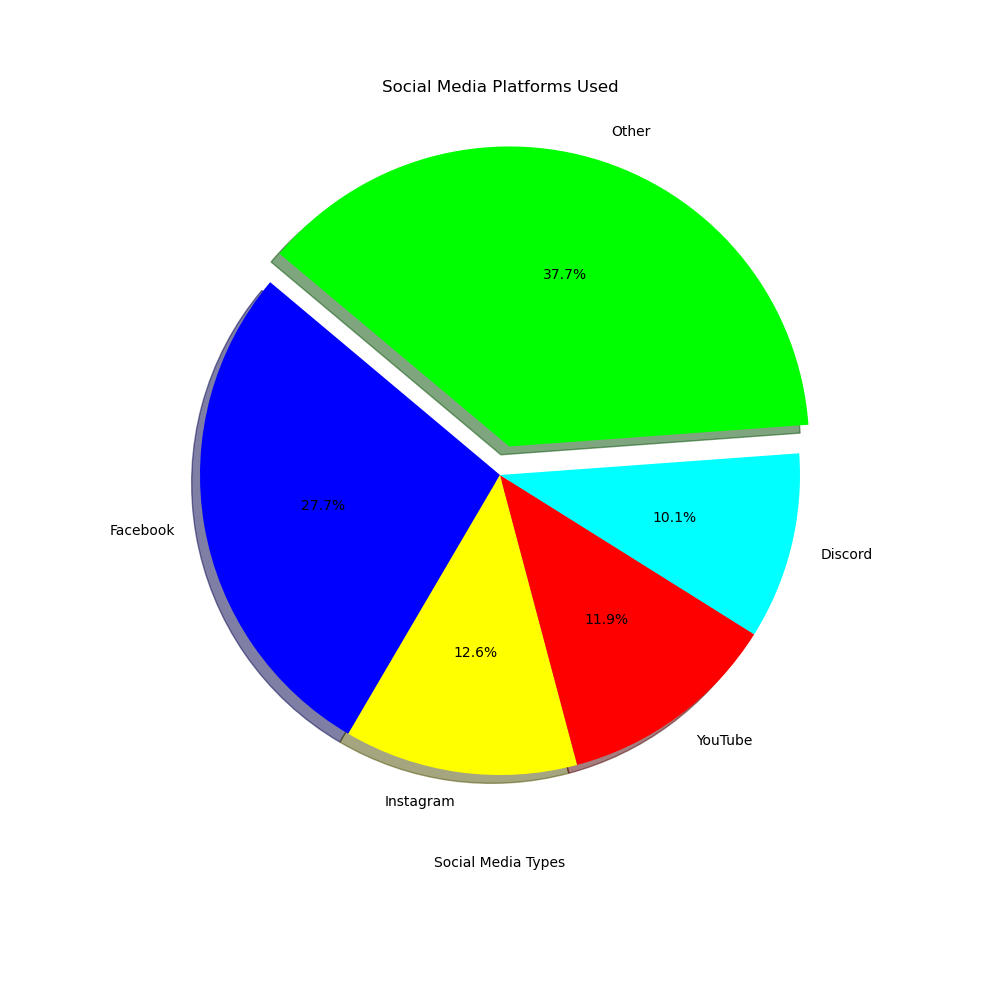

In [58]:
#Create pie chart for which social media platforms are used
labels = ["Facebook", "Instagram", "YouTube", "Discord", "Other"]
sizes = [220,100, 95, 80, 300]
colors = ["blue", "yellow", "red", "cyan", "lime"]
explode = (0, 0, 0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Social Media Platforms Used")
plt.ylabel('')




plt.show()

In [52]:
#Gather Total score for each platform individually
mental_score = []
plat_names = []

for index, row in social_media_data.iterrows():

    if "Facebook" in row["Platforms"]:

        fb_count += 1
        mental_score.append(row["Total score"])
        plat_names.append("Facebook")
    if "Twitter" in row["Platforms"]:

        twt_count += 1
        mental_score.append(row["Total score"])
        plat_names.append("Twitter")
    if "Pinterest" in row["Platforms"]:

        pint_count += 1
        mental_score.append(row["Total score"])
        plat_names.append("Pinterest")
    if "Snapchat" in row["Platforms"]:

        snap_count += 1
        mental_score.append(row["Total score"])
        plat_names.append("Snapchat")
    if "Instagram" in row["Platforms"]:

        insta_count += 1
        mental_score.append(row["Total score"])
        plat_names.append("Instagram")
    if "Reddit" in row["Platforms"]:

        red_count += 1
        mental_score.append(row["Total score"])
        plat_names.append("Reddit")
    if "YouTube" in row["Platforms"]:

        yt_count += 1
        mental_score.append(row["Total score"])
        plat_names.append("YouTube")
    if "Discord" in row["Platforms"]:

         dis_count += 1
         mental_score.append(row["Total score"])
         plat_names.append("Discord")
    if "TikTok" in row["Platforms"]:

        tt_count += 1
        mental_score.append(row["Total score"])
        plat_names.append("TikTok")


In [53]:
plot_data = pd.DataFrame({"Platforms": plat_names,
                          "Total scores": mental_score})
plot_data

,Platforms,Total scores
0,Facebook,43
1,Twitter,43
2,Instagram,43
3,Reddit,43
4,YouTube,43
...,...,...
2048,Instagram,37
2049,YouTube,37
2050,Discord,37
2051,Facebook,26


In [54]:
platforms_df = pd.DataFrame({"Facebook": [fb_mental_score],
                                 "Twitter": [twt_mental_score],
                                 "Instagram": [insta_mental_score],
                                 "YouTube": [yt_mental_score],
                                 "Discord": [dis_mental_score],
                                 "Reddit": [red_mental_score],
                                 "Pinterest": [pint_mental_score],
                                 "TikTok": [tt_menta_score],
                                 "Snapchat": [snap_mental_score]



})
platforms_df

,Facebook,Twitter,Instagram,YouTube,Discord,Reddit,Pinterest,TikTok,Snapchat
0,"[43, 43, 35, 35, 44, 40, 43, 33, 31, 47, 38, 3...","[43, 43, 40, 35, 35, 32, 32, 47, 47, 37, 30, 3...","[43, 43, 35, 35, 44, 40, 43, 33, 31, 47, 38, 3...","[43, 43, 35, 44, 40, 43, 33, 31, 47, 38, 35, 3...","[43, 43, 40, 47, 38, 35, 26, 36, 28, 32, 47, 4...","[43, 43, 12, 38, 35, 35, 36, 37, 36, 28, 32, 3...","[35, 40, 12, 38, 35, 35, 60, 43, 35, 41, 33, 3...","[40, 43, 38, 32, 41, 35, 38, 45, 44, 50, 33, 4...","[43, 38, 35, 35, 35, 41, 48, 30, 43, 18, 36, 4..."


In [55]:
#Create cleaned DataFrame for chart
cleaned_data = pd.DataFrame({"Platforms": ["Facebook", "Twitter", "Instagram", "YouTube", "Discord", "Reddit", "Pinterest", "TikTok", "Snapchat"],
                     "Total scores": [len(fb_mental_score), len(twt_mental_score), len(insta_mental_score), len(yt_mental_score), len(dis_mental_score),
                                       len(red_mental_score), len(pint_mental_score), len(tt_menta_score), len(snap_mental_score)]})

cleaned_data

,Platforms,Total scores
0,Facebook,407
1,Twitter,131
2,Instagram,359
3,YouTube,412
4,Discord,198
5,Reddit,126
6,Pinterest,145
7,TikTok,94
8,Snapchat,181


Text(0.5, 0.98, '')

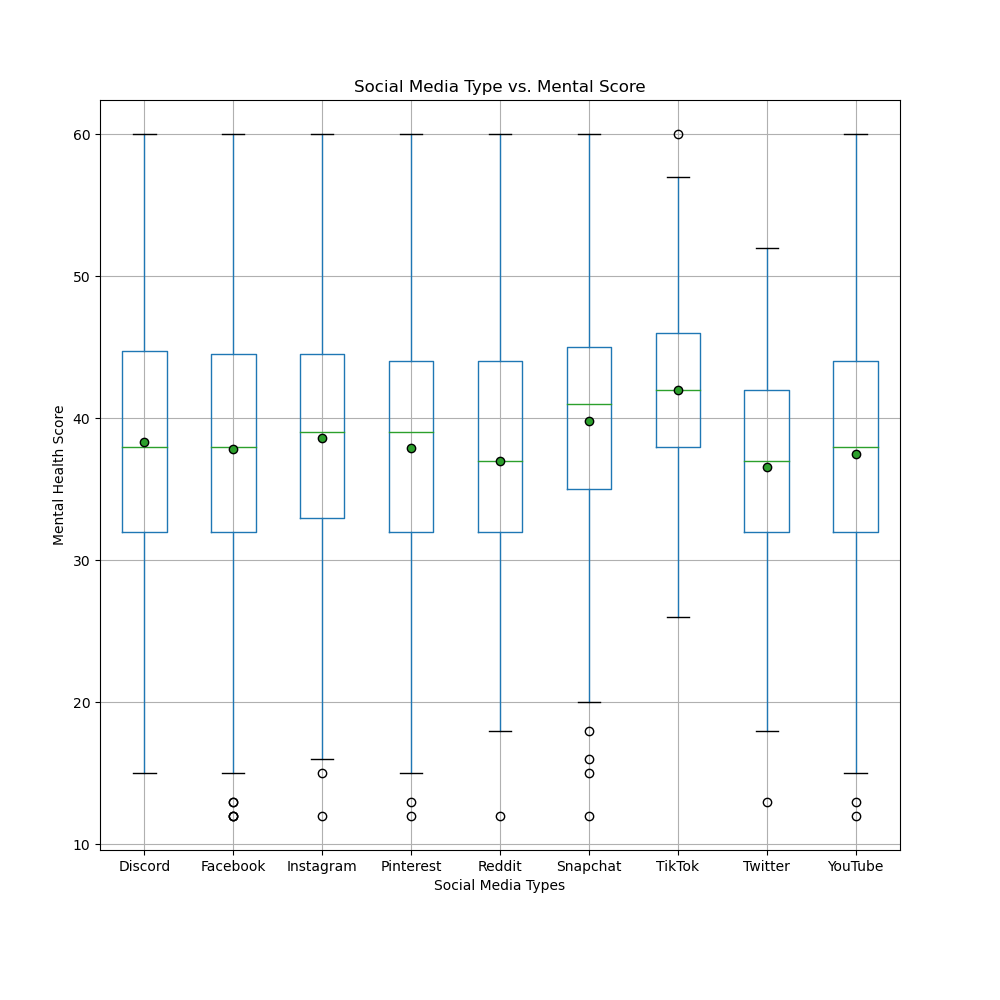

In [56]:
#Create boxplot for social meadia types vs mental health score
fig = plot_data.boxplot("Total scores", by="Platforms", figsize=(10, 10), showmeans=True,
                                meanprops={"marker":"o", "markeredgecolor": "black"})

fig.set_title("Social Media Type vs. Mental Score")
fig.set_xlabel("Social Media Types")
fig.set_ylabel("Mental Health Score")
fig.get_figure().suptitle("")

In [57]:
#Perform ANOVA test for 
g0_1 = social_media_data[social_media_data["Platforms"] == "Facebook"]["Total score"]
g0_2 = social_media_data[social_media_data["Platforms"] == "Twitter"]["Total score"]
g0_3 = social_media_data[social_media_data["Platforms"] == "Pinterest"]["Total score"]
g0_4 = social_media_data[social_media_data["Platforms"] == "Snapchat"]["Total score"]
g0_5 = social_media_data[social_media_data["Platforms"] == "Instagram"]["Total score"]
g0_6 = social_media_data[social_media_data["Platforms"] == "Reddit"]["Total score"]
g0_7 = social_media_data[social_media_data["Platforms"] == "YouTube"]["Total score"]
g0_8 = social_media_data[social_media_data["Platforms"] == "Discord"]["Total score"]
g0_9 = social_media_data[social_media_data["Platforms"] == "TikTok"]["Total score"]

stats.f_oneway(g0_1, g0_2, g0_3, g0_5, g0_6, g0_7, g0_8, g0_9)

F_onewayResult(statistic=1.205947845913222, pvalue=0.32986418660221234)